In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
# from sklearn.impute import SimpleImputer

In [2]:
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path, index_col='Id')
home_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
numeric_cols = [col for col in home_data.columns if home_data[col].dtype in ['int64', 'float64']]
X_num = home_data[numeric_cols]

data_1 = X_num.isnull().sum()
data_1 = data_1[data_1 > 0]
print(data_1)
cols_1 = data_1.index

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [4]:
# num_imputer = SimpleImputer()
# imputed_X_num = pd.DataFrame(num_imputer.fit_transform(X_num))
# imputed_X_num.columns = X_num.columns
# X_num = imputed_X_num

In [5]:
X_num = X_num.drop(cols_1, axis=1)
X_num = X_num.drop('SalePrice', axis=1)

In [6]:
# features_num = X_num.columns
# corr_num = home_data[features_num].corr()
# sns.heatmap(corr_num)

In [7]:
object_cols = np.array([col for col in home_data.columns if home_data[col].dtype == "object"])
X_cat = home_data[object_cols]

data_2 = X_cat.isnull().sum()
data_2 = data_2[data_2 > 0]
print(data_2)
cols_2 = data_2.index

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [8]:
# cat_imputer = SimpleImputer(strategy='most_frequent')
# imputed_X_cat = pd.DataFrame(cat_imputer.fit_transform(X_cat))
# imputed_X_cat.columns = X_cat.columns
# X_cat = imputed_X_cat

In [9]:
X_cat = X_cat.drop(cols_2, axis=1)

In [10]:
# features_cat = X_cat.columns
# corr_cat = home_data[features_cat].corr()
# sns.heatmap(corr_cat)

In [11]:
X_corr = pd.concat([X_num, X_cat], axis=1)

<AxesSubplot:>

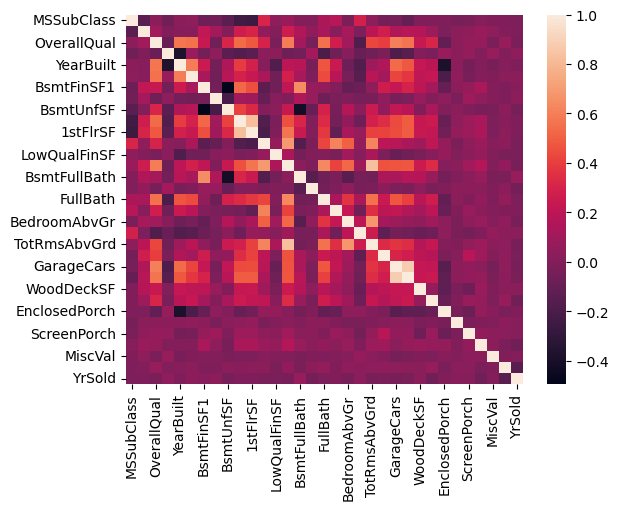

In [12]:
features_combined = X_corr.columns
corr_combined = home_data[features_combined].corr()
sns.heatmap(corr_combined)

In [13]:
# object_nunique = list(map(lambda col: home_data[col].nunique(), object_cols))
# d = dict(zip(object_cols, object_nunique))

# # Print number of unique entries by column, in ascending order
# p = sorted(d.items(), key=lambda x: x[1])
# print(p)
# print(len(p))

In [14]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X_cat))
OH_cols.index = X_cat.index
X = pd.concat([X_num, OH_cols], axis=1)

In [15]:
y = home_data.SalePrice

In [16]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(train_X, train_y)
tree_predictions = tree_model.predict(val_X)

C:\Users\aaaaa\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\aaaaa\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [18]:
tree_mae = mean_absolute_error(val_y, tree_predictions)
print(mean_absolute_error(val_y, tree_predictions))

26615.575342465752


In [19]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
forest_predictions = forest_model.predict(val_X)

C:\Users\aaaaa\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\aaaaa\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [20]:
forest_mae = mean_absolute_error(val_y, forest_predictions)
print(mean_absolute_error(val_y, forest_predictions))
# print(np.sqrt(mean_squared_error(val_y, forest_predictions)))

16473.276584474886


In [21]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(train_X, train_y)
svr_predictions = svr_model.predict(val_X)

C:\Users\aaaaa\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\aaaaa\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [22]:
svr_mae = mean_absolute_error(val_y, svr_predictions)
print(mean_absolute_error(val_y, svr_predictions))

55676.03593893583


In [23]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=1000)
xgb_model.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)],
             verbose=False)
xgb_predictions = xgb_model.predict(val_X)

C:\Users\aaaaa\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [24]:
xgb_mae = mean_absolute_error(val_y, xgb_predictions)
print(mean_absolute_error(val_y, xgb_predictions))

16058.633690068493


In [25]:
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor(random_state=0)
ada_model.fit(train_X, train_y)
ada_predictions = ada_model.predict(val_X)

C:\Users\aaaaa\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\aaaaa\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [26]:
ada_mae = mean_absolute_error(val_y, ada_predictions)
print(mean_absolute_error(val_y, ada_predictions))

24156.05256280584


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model=tf.keras.Sequential([
    Dense(10, input_shape=(X.shape[1],), activation="relu"),
    Dense(30, activation="relu"),
    Dense(30, activation="relu"), 
    Dense(1)
])

model.compile(loss="mean_absolute_error" , optimizer="adam", metrics=["mean_absolute_error"])
model.fit(train_X, train_y, epochs=100, verbose=0)

In [28]:
model.evaluate(val_X, val_y)

pred = model.predict(val_X)
tf_mae = mean_absolute_error(val_y, pred)
print(mean_absolute_error(val_y, pred))

12/12 [==============================] - 0s 3ms/step - loss: 26090.4277 - mean_absolute_error: 26090.4277
26090.426551797944


In [29]:
print("Tree_mae:", tree_mae)
print("Forest_mae:", forest_mae)
print("Svr_mae:", svr_mae)
print("Xgb_mae:", xgb_mae)
print("Ada_mae:", ada_mae)
print("Tf_mae:", tf_mae)

Tree_mae: 26615.575342465752
Forest_mae: 16473.276584474886
Svr_mae: 55676.03593893583
Xgb_mae: 16058.633690068493
Ada_mae: 24156.05256280584
Tf_mae: 26090.426551797944
